In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold,cross_val_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
df_train = pd.read_csv('drive/MyDrive/data/train.csv')
df_test= pd.read_csv('drive/MyDrive/data/test.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Preprocesing

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_train.select_dtypes(exclude=['object']).isnull().sum().sort_values(ascending = False)[0:5]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Id               0
OpenPorchSF      0
dtype: int64

In [ ]:
df_train.select_dtypes(include=['object']).isnull().sum().sort_values(ascending = False)[0:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
dtype: int64

In [ ]:
df_train.info()

přehled proměnných funkce

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def des_object(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts[:min(10,vcounts_len)])
    print("*********************************")
    print("")
    
def des_numeric(df, varname):
    print("*********************************")    
    table = pd.DataFrame(df[varname].describe().round(2))

    plt.figure(figsize=(16,5))
    plt.subplot(131)
    i = 9
    for row in range(len(table)):
      text = table.index[row] + ": " + str(table.iloc[row,0])
      plt.axis([0, 10, 0, 10])
    #ax6.text(2.5, 12, "UFC score: " + score(opponent), style='italic',fontsize=14, fontweight='bold',horizontalalignment='left', color='blue',
     #   bbox={'facecolor': 'red', 'alpha': 0, 'pad': 10})
      plt.text(0, i, text, horizontalalignment='left', fontsize=12 )
      i-=0.5
    plt.text(0, i, f"Null values: {df[varname].isnull().sum()}", horizontalalignment='left', fontsize=12 )
    plt.text(0, i-0.5, f"NA values: {df[varname].isna().sum()}", horizontalalignment='left', fontsize=12 )
    plt.text(0, i-1, f"unique values: {df[varname].nunique()}", horizontalalignment='left', fontsize=12 )
    plt.title(varname + "| type:" + str(df[varname].dtype),loc='left', weight = 'bold')
    plt.axis('off')

    plt.subplot(132)
    g= sns.histplot(data=df[varname], kde = True)
    g.set_title('Histogram')
    plt.subplot(133)
    g1 = sns.boxplot(data=df[varname], palette=['#7FFF00'])
    g1.set_title('Boxplot')
    plt.xticks([])
    plt.tight_layout()
    plt.show()
    
def des_df(df):
    for c in df.columns:
        if df[c].dtype == object:
            des_object(df,c)
        else:
            des_numeric(df,c)

*********************************


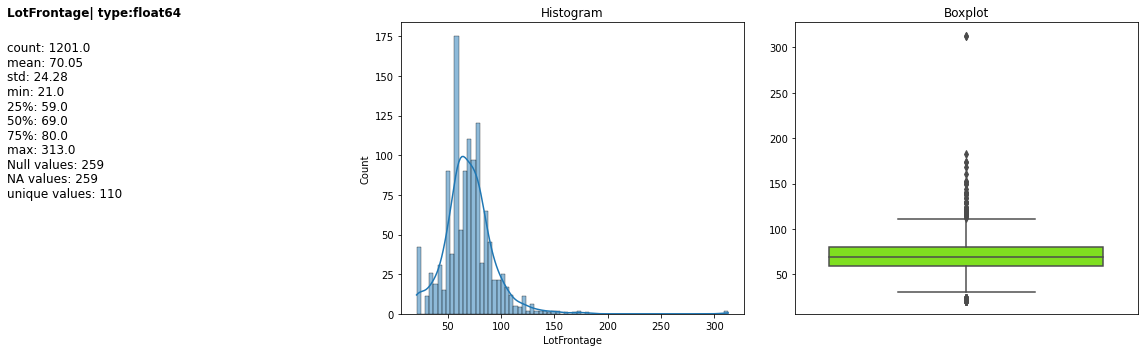

*********************************


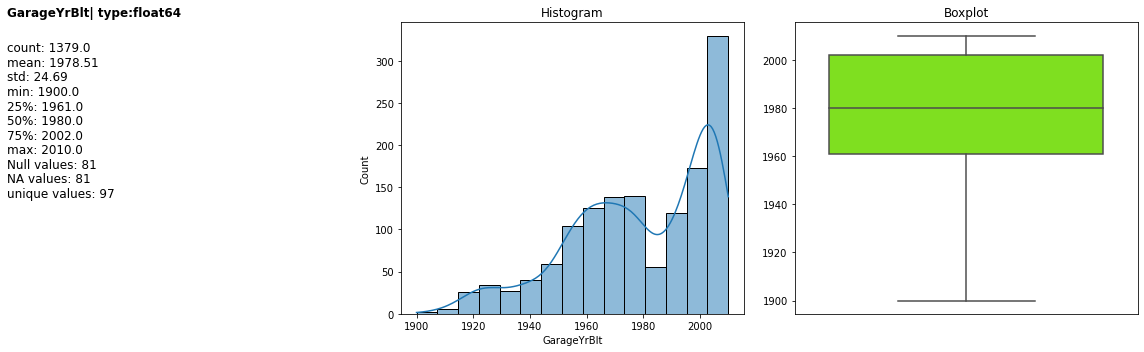

*********************************


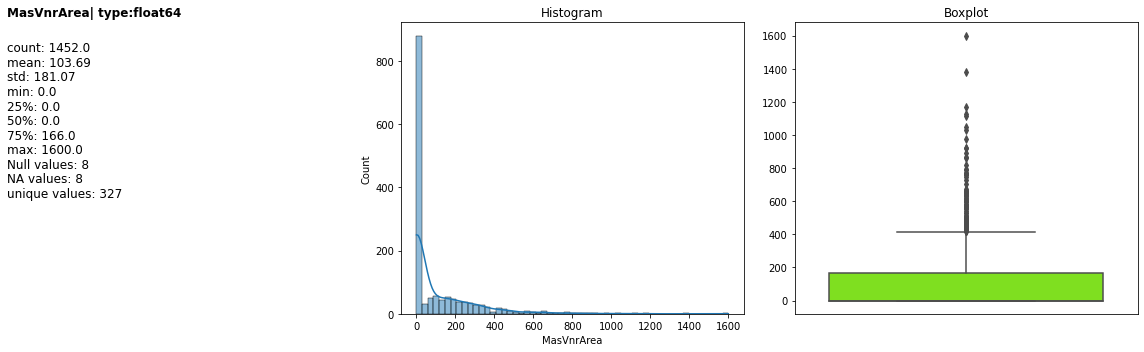

In [ ]:
des_df(df_train[['LotFrontage','GarageYrBlt', 'MasVnrArea']])

In [ ]:
def handle_values(df):
  df[['LotFrontage','GarageYrBlt']]=df[['LotFrontage','GarageYrBlt']].fillna(value=df.mean().iloc[0])
  df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
  df = df.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1).copy()
  df = df.dropna()
  return df

In [ ]:
df_train = handle_values(df_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df_train.select_dtypes(exclude=['object']).isnull().sum()[0:3]

Id             0
MSSubClass     0
LotFrontage    0
dtype: int64

In [ ]:
df_train.select_dtypes(include=['object']).isnull().sum().sort_values(ascending = False)[0:5]

MSZoning        0
Electrical      0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
dtype: int64

In [ ]:
df_train.shape

(1338, 76)

*********************************


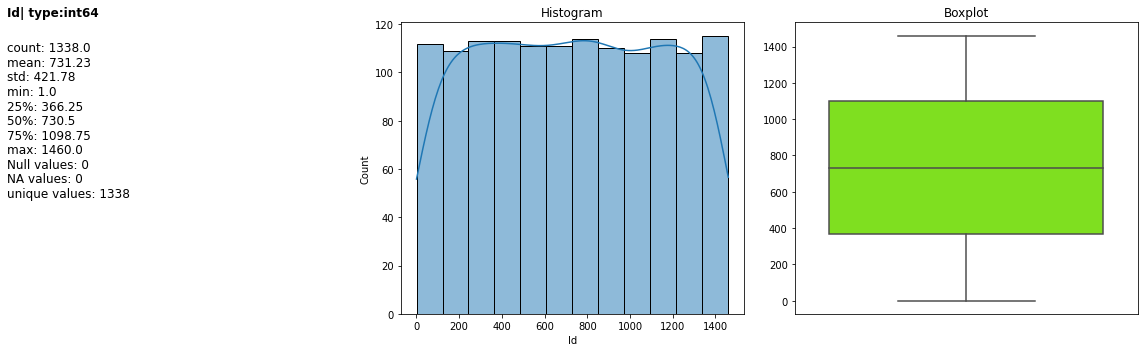

*********************************


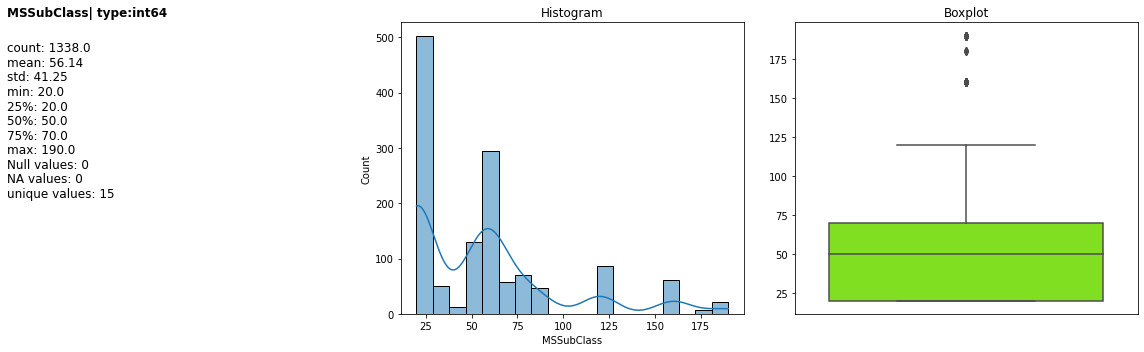


*********************************
***********
MSZoning | type: object
***********
There are 5 different values.
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64
*********************************

*********************************


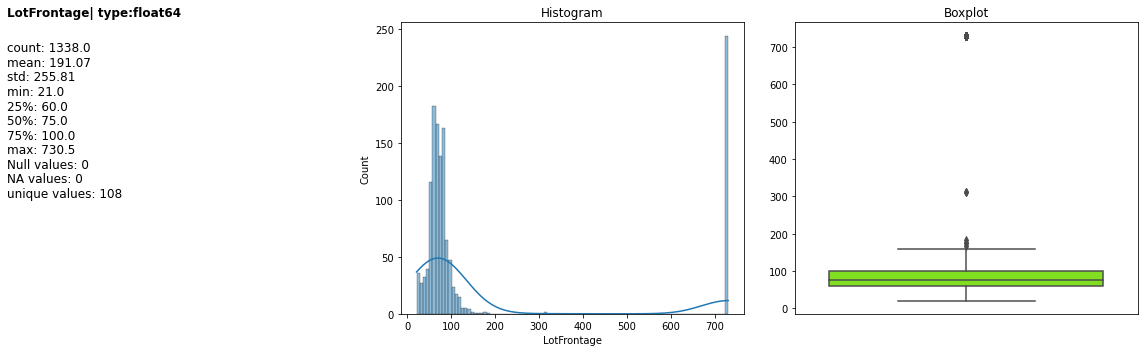

*********************************


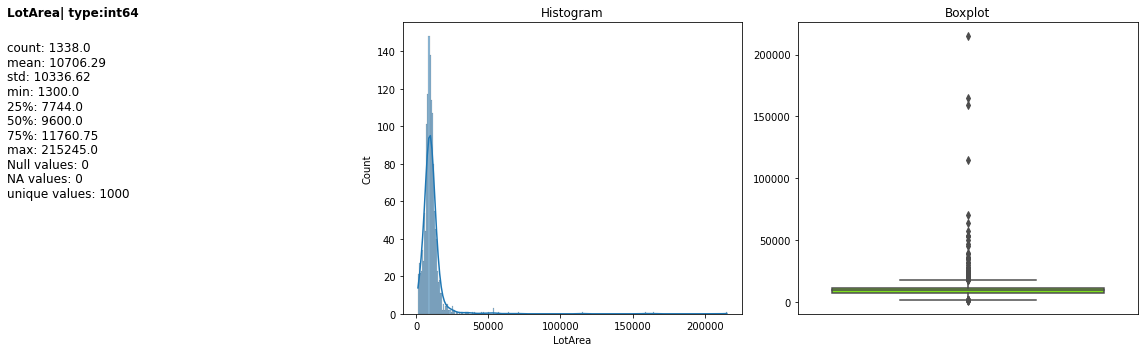


*********************************
***********
Street | type: object
***********
There are 2 different values.
Pave    1333
Grvl       5
Name: Street, dtype: int64
*********************************


*********************************
***********
LotShape | type: object
***********
There are 4 different values.
Reg    829
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64
*********************************


*********************************
***********
LandContour | type: object
***********
There are 4 different values.
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64
*********************************


*********************************
***********
Utilities | type: object
***********
There are 2 different values.
AllPub    1337
NoSeWa       1
Name: Utilities, dtype: int64
*********************************


*********************************
***********
LotConfig | type: object
***********
There are 5 different values.
Inside     957
Corner     

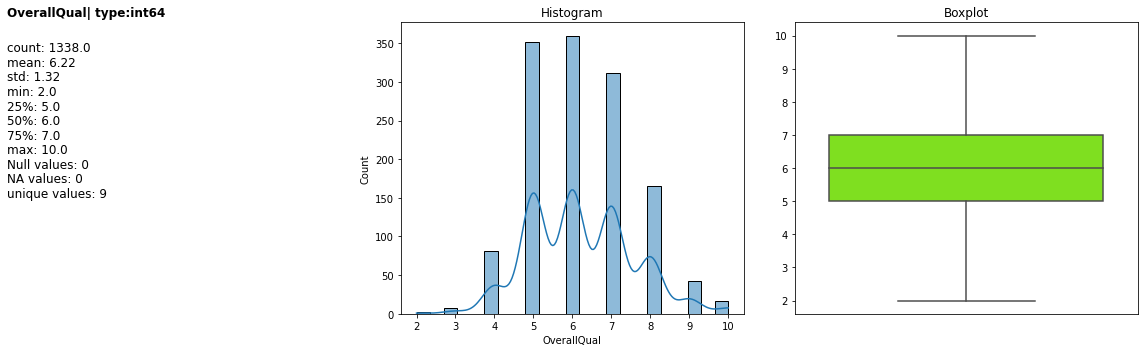

*********************************


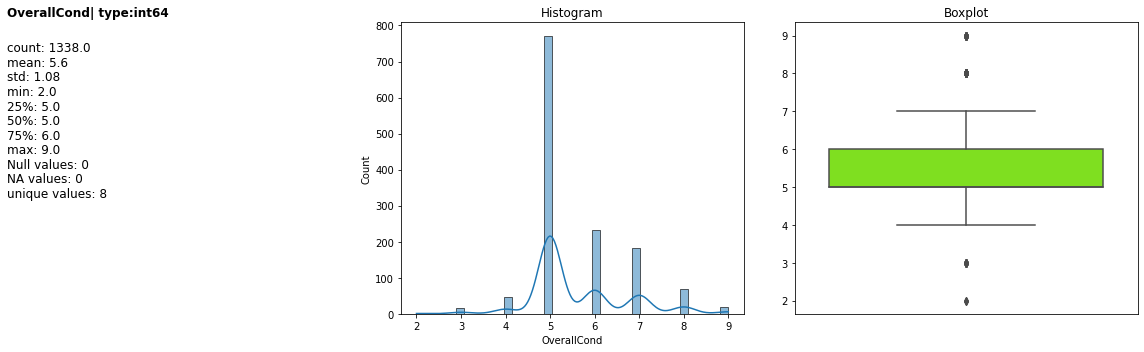

*********************************


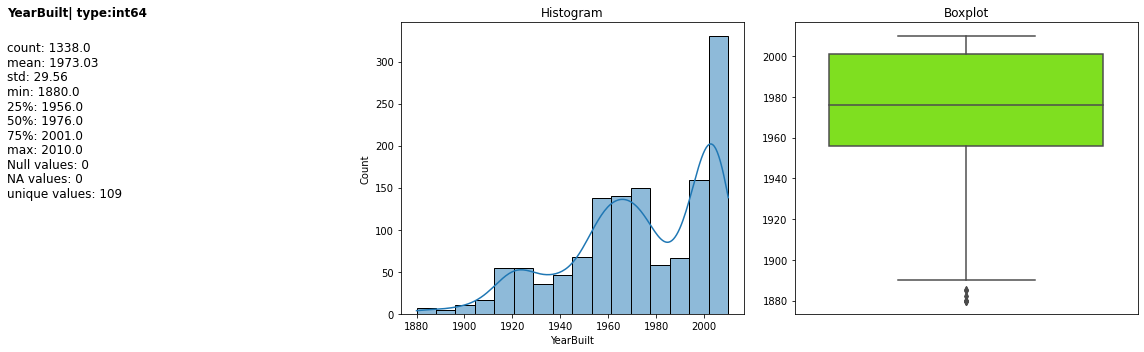

*********************************


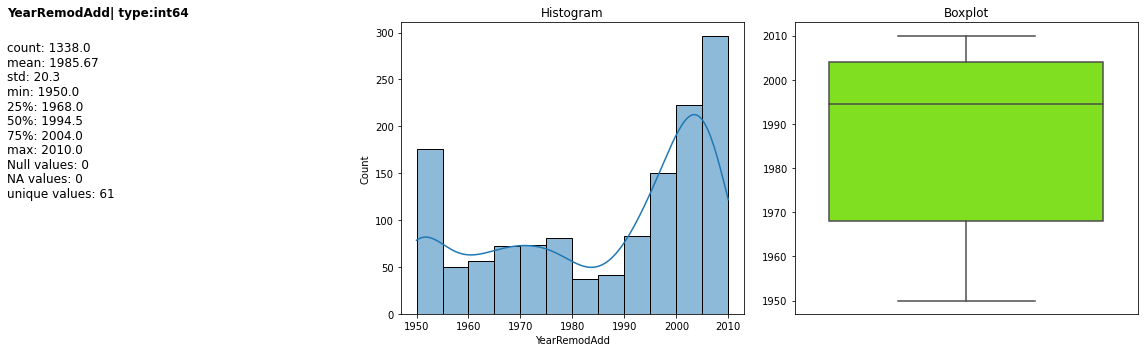


*********************************
***********
RoofStyle | type: object
***********
There are 6 different values.
Gable      1037
Hip         272
Flat         11
Gambrel      10
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64
*********************************


*********************************
***********
RoofMatl | type: object
***********
There are 8 different values.
CompShg    1314
Tar&Grv       9
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
*********************************


*********************************
***********
Exterior1st | type: object
***********
There are 14 different values.
VinylSd    486
HdBoard    211
MetalSd    201
Wd Sdng    183
Plywood    100
CemntBd     52
BrkFace     44
Stucco      21
WdShing     20
AsbShng     15
Name: Exterior1st, dtype: int64
*********************************


*********************************
***********
Exterior2nd | type: object
***********


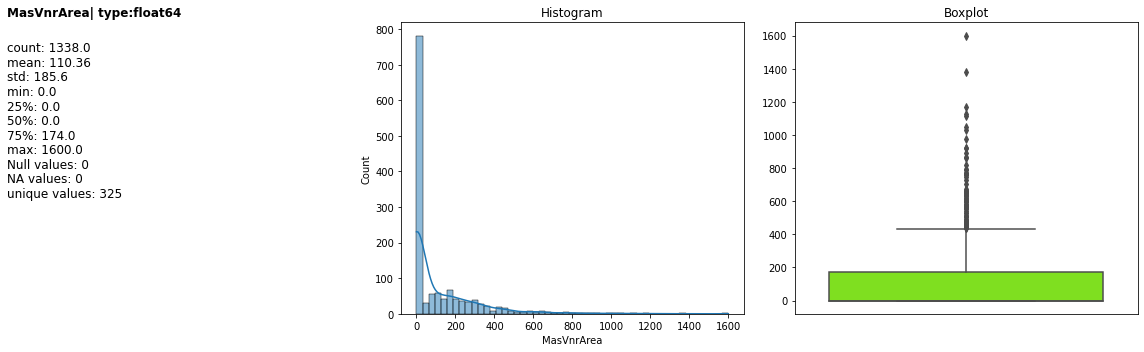


*********************************
***********
ExterQual | type: object
***********
There are 4 different values.
TA    803
Gd    477
Ex     51
Fa      7
Name: ExterQual, dtype: int64
*********************************


*********************************
***********
ExterCond | type: object
***********
There are 4 different values.
TA    1183
Gd     137
Fa      16
Ex       2
Name: ExterCond, dtype: int64
*********************************


*********************************
***********
Foundation | type: object
***********
There are 5 different values.
PConc     620
CBlock    580
BrkTil    129
Stone       6
Wood        3
Name: Foundation, dtype: int64
*********************************


*********************************
***********
BsmtQual | type: object
***********
There are 4 different values.
TA    594
Gd    592
Ex    120
Fa     32
Name: BsmtQual, dtype: int64
*********************************


*********************************
***********
BsmtCond | type: object
***********
There a

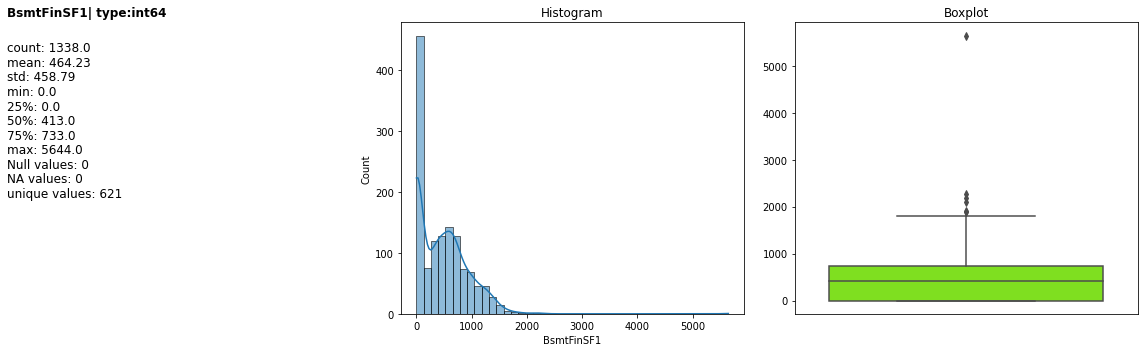


*********************************
***********
BsmtFinType2 | type: object
***********
There are 6 different values.
Unf    1176
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64
*********************************

*********************************


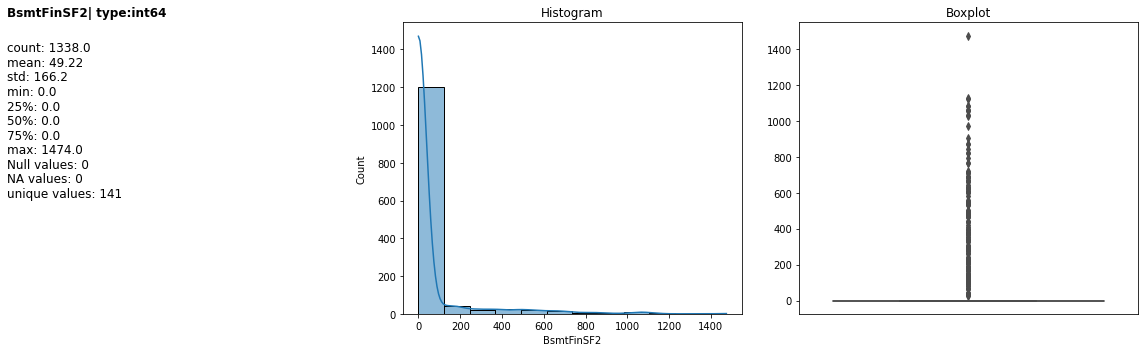

*********************************


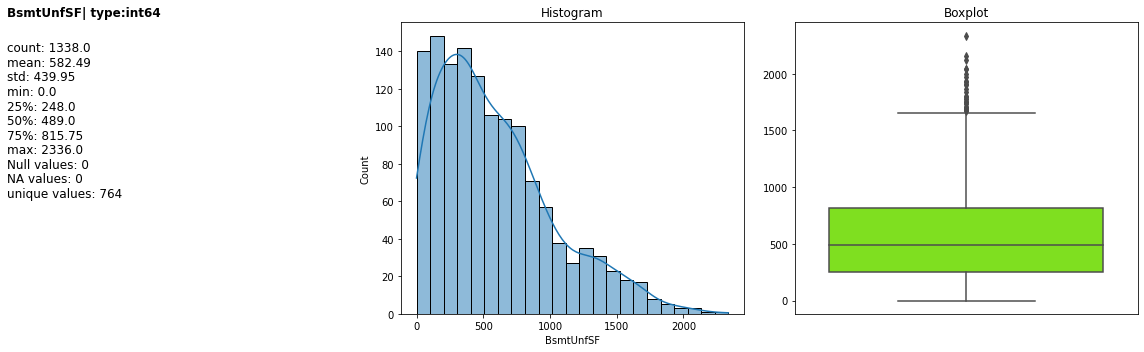

*********************************


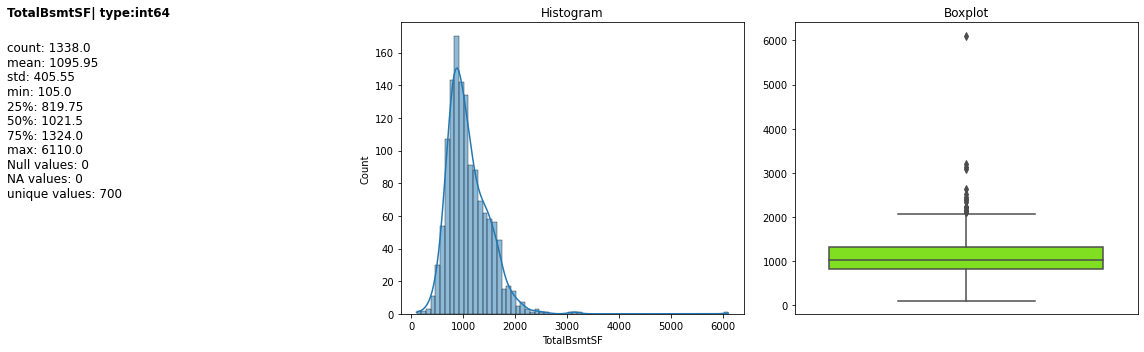


*********************************
***********
Heating | type: object
***********
There are 4 different values.
GasA    1318
GasW      16
Grav       3
OthW       1
Name: Heating, dtype: int64
*********************************


*********************************
***********
HeatingQC | type: object
***********
There are 5 different values.
Ex    704
TA    380
Gd    217
Fa     36
Po      1
Name: HeatingQC, dtype: int64
*********************************


*********************************
***********
CentralAir | type: object
***********
There are 2 different values.
Y    1277
N      61
Name: CentralAir, dtype: int64
*********************************


*********************************
***********
Electrical | type: object
***********
There are 5 different values.
SBrkr    1242
FuseA      76
FuseF      17
FuseP       2
Mix         1
Name: Electrical, dtype: int64
*********************************

*********************************


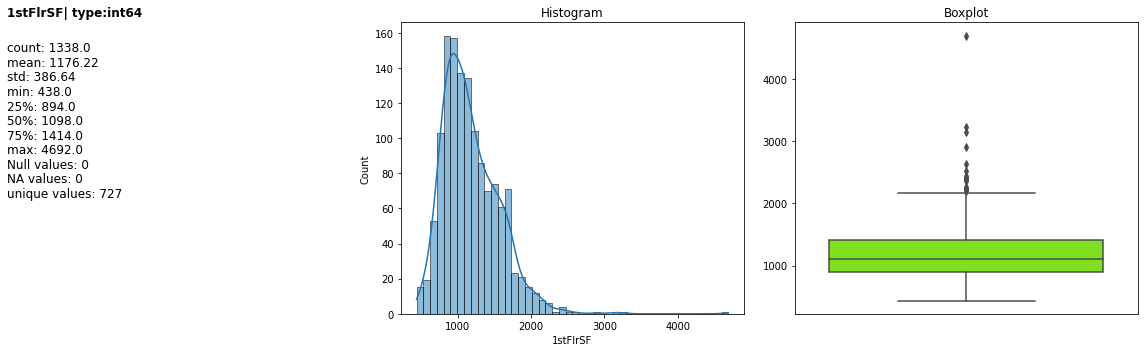

*********************************


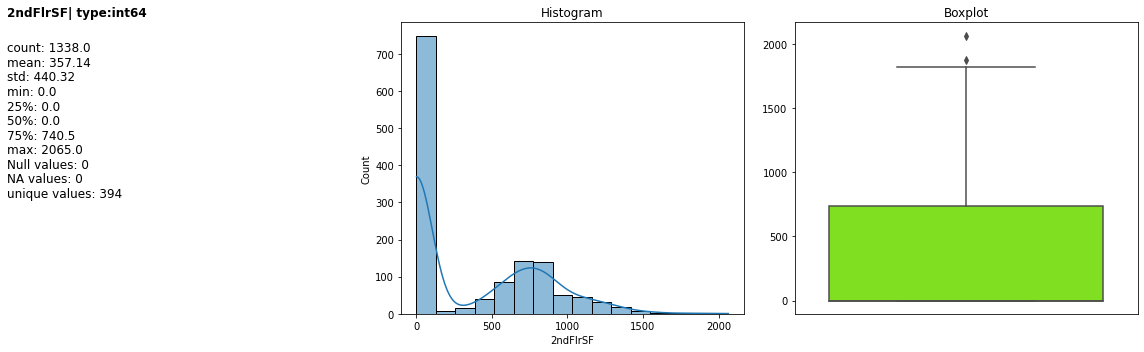

*********************************


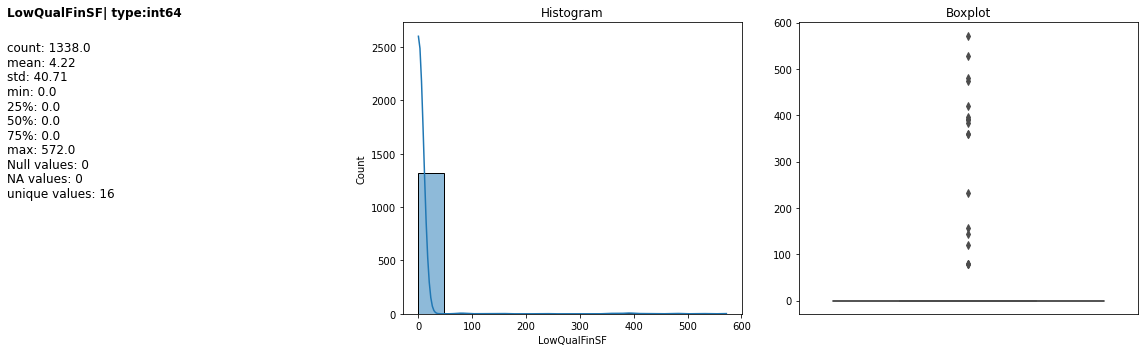

*********************************


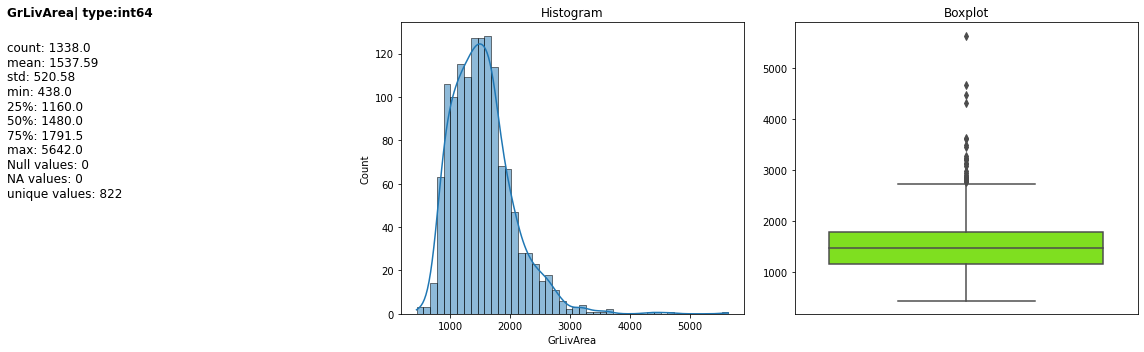

*********************************


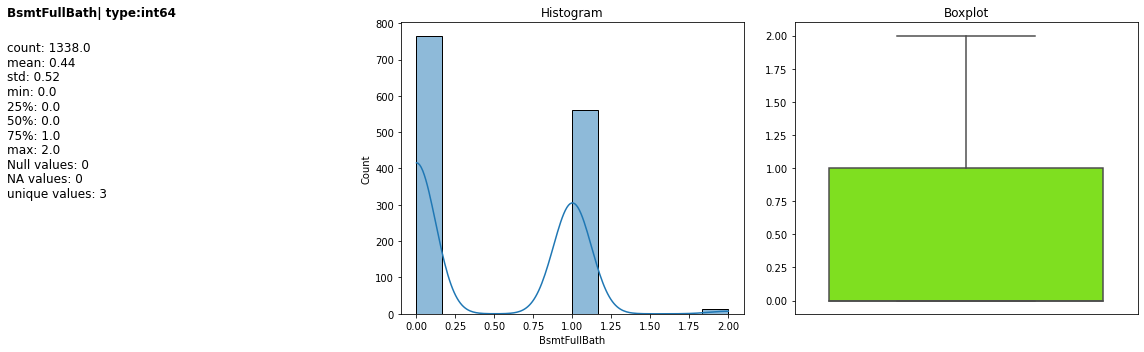

*********************************


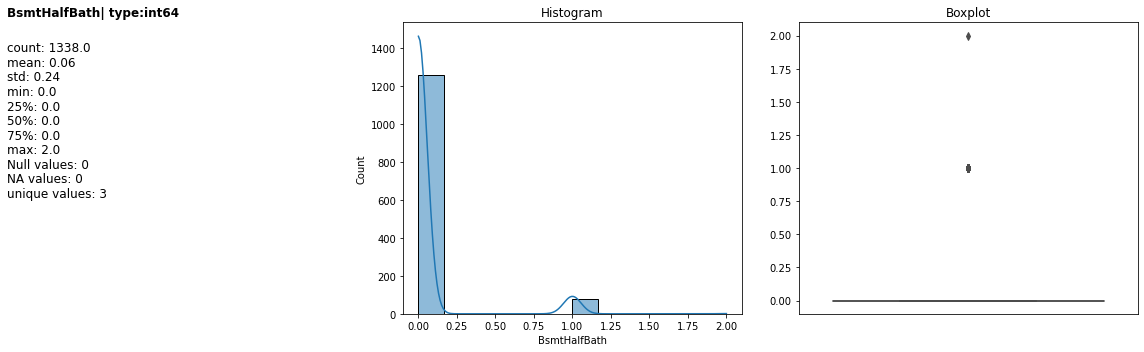

*********************************


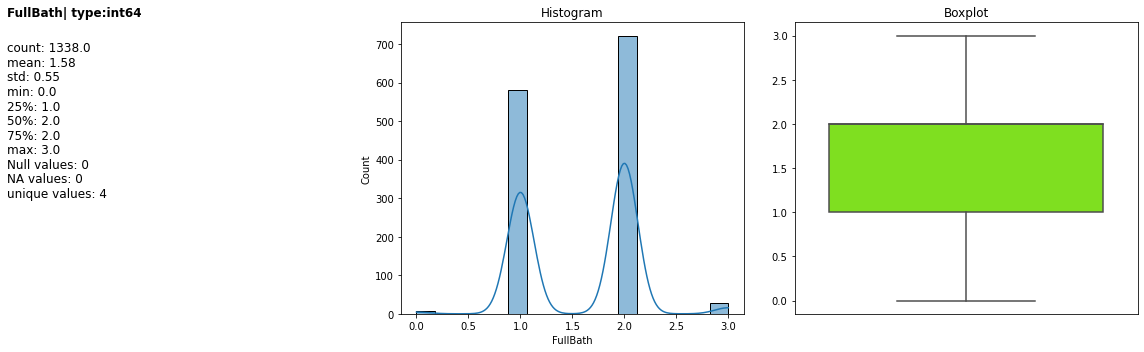

*********************************


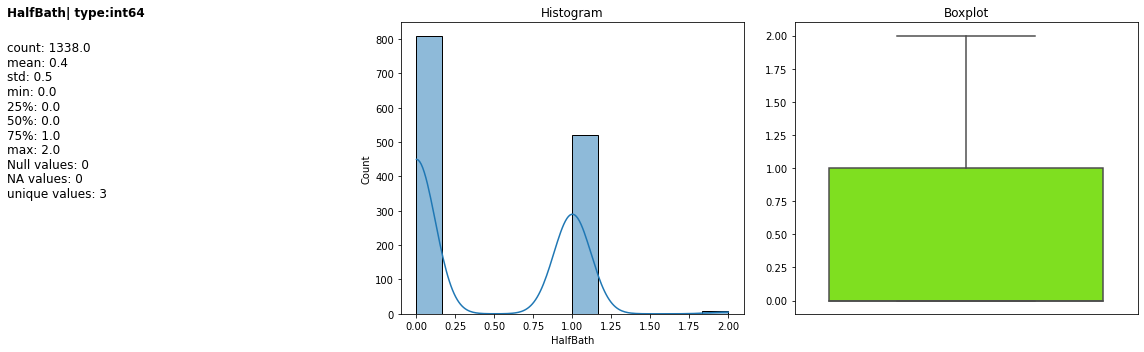

*********************************


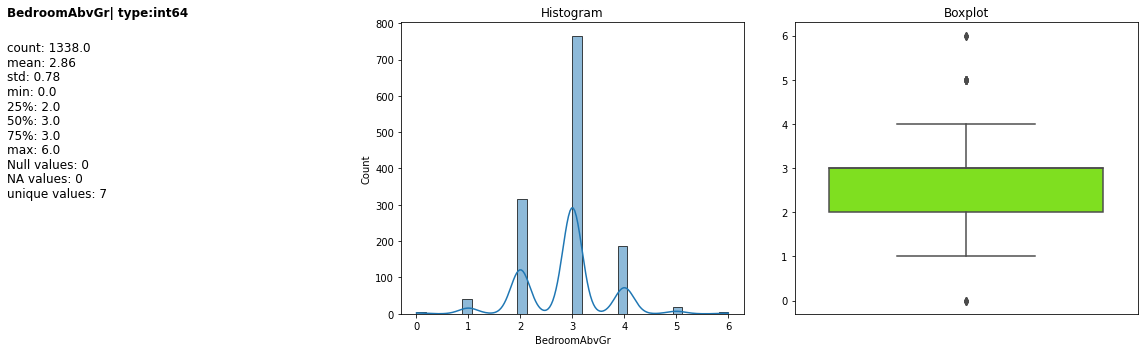

*********************************


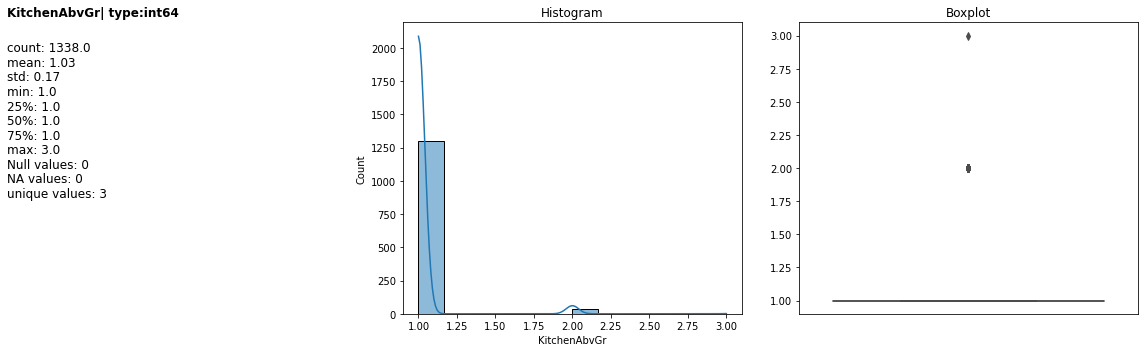


*********************************
***********
KitchenQual | type: object
***********
There are 4 different values.
TA    650
Gd    568
Ex     97
Fa     23
Name: KitchenQual, dtype: int64
*********************************

*********************************


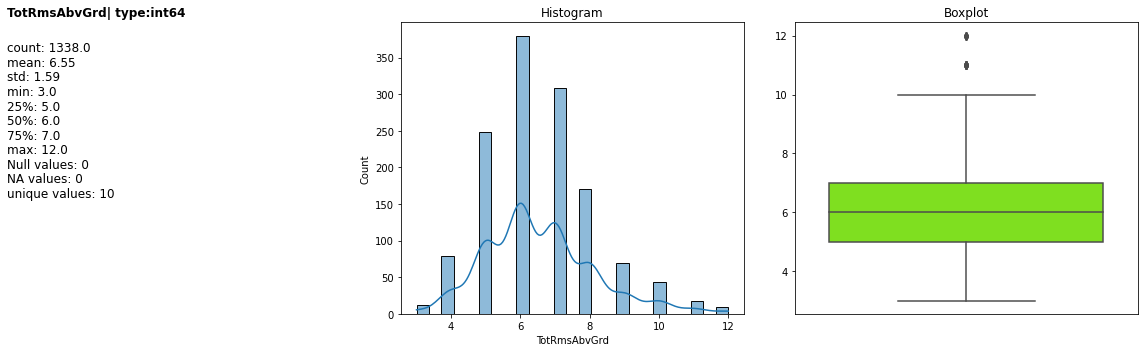


*********************************
***********
Functional | type: object
***********
There are 7 different values.
Typ     1254
Min2      30
Min1      28
Mod       11
Maj1      10
Maj2       4
Sev        1
Name: Functional, dtype: int64
*********************************

*********************************


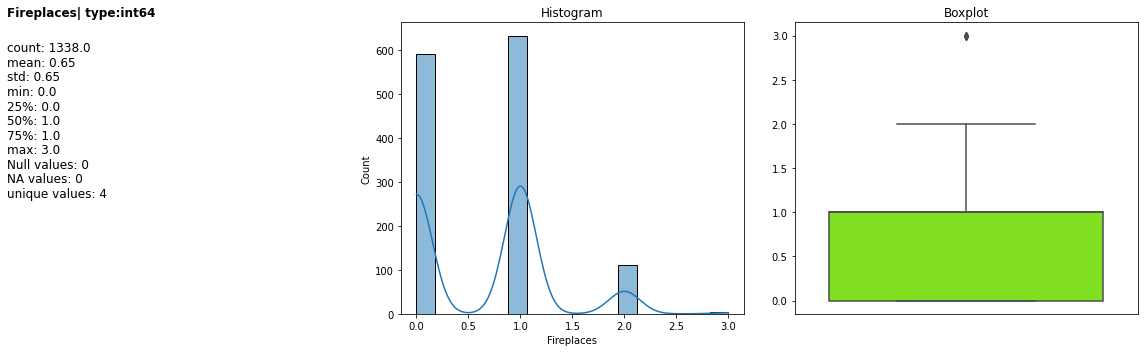


*********************************
***********
GarageType | type: object
***********
There are 6 different values.
Attchd     852
Detchd     369
BuiltIn     85
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64
*********************************

*********************************


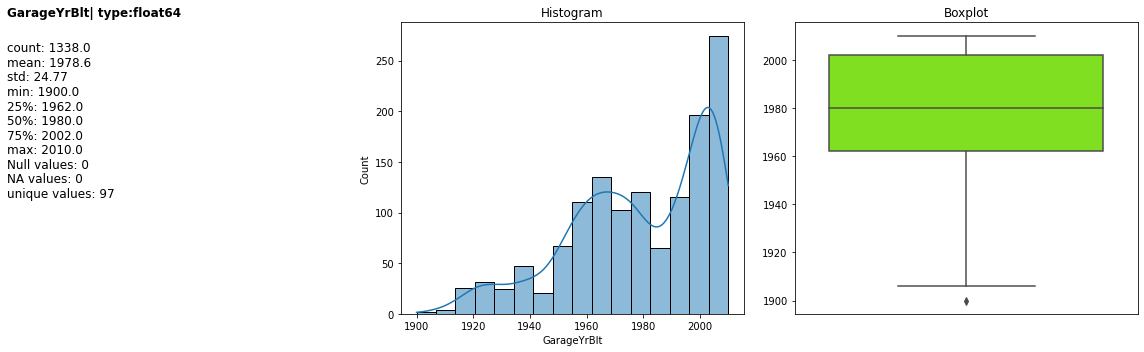


*********************************
***********
GarageFinish | type: object
***********
There are 3 different values.
Unf    580
RFn    413
Fin    345
Name: GarageFinish, dtype: int64
*********************************

*********************************


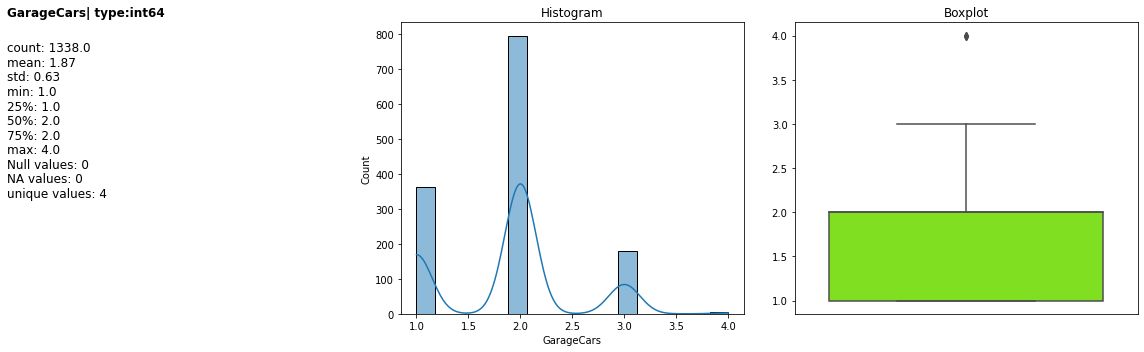

*********************************


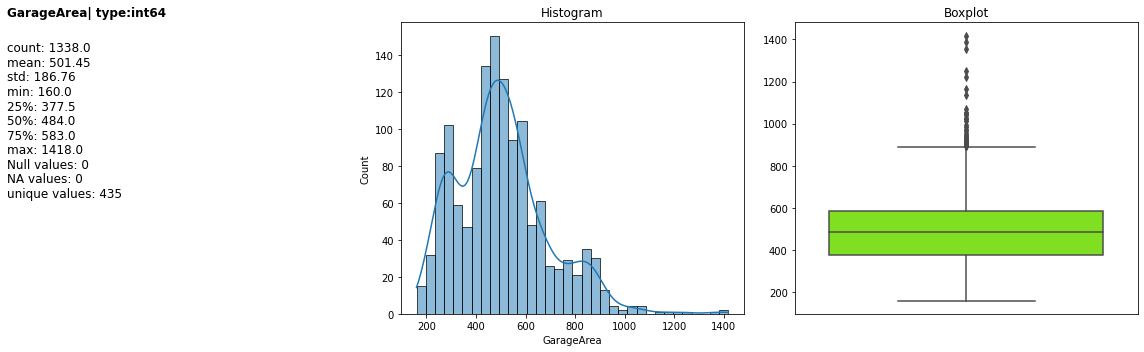


*********************************
***********
GarageQual | type: object
***********
There are 5 different values.
TA    1270
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
*********************************


*********************************
***********
GarageCond | type: object
***********
There are 5 different values.
TA    1287
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
*********************************


*********************************
***********
PavedDrive | type: object
***********
There are 3 different values.
Y    1257
N      54
P      27
Name: PavedDrive, dtype: int64
*********************************

*********************************


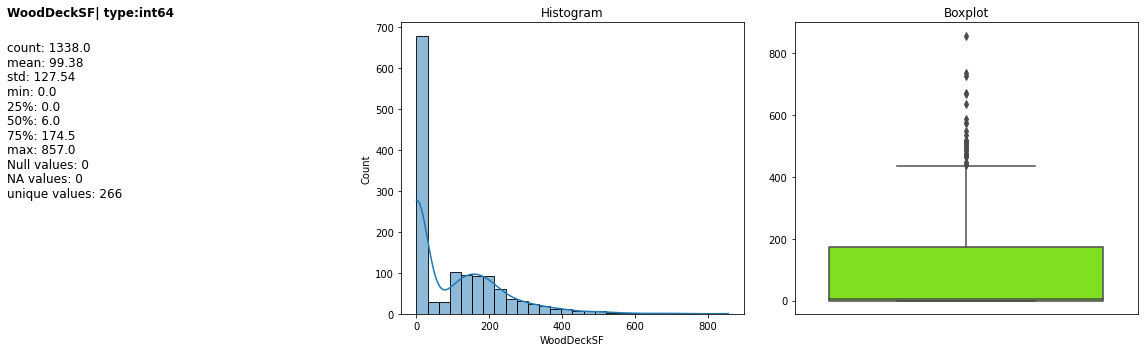

*********************************


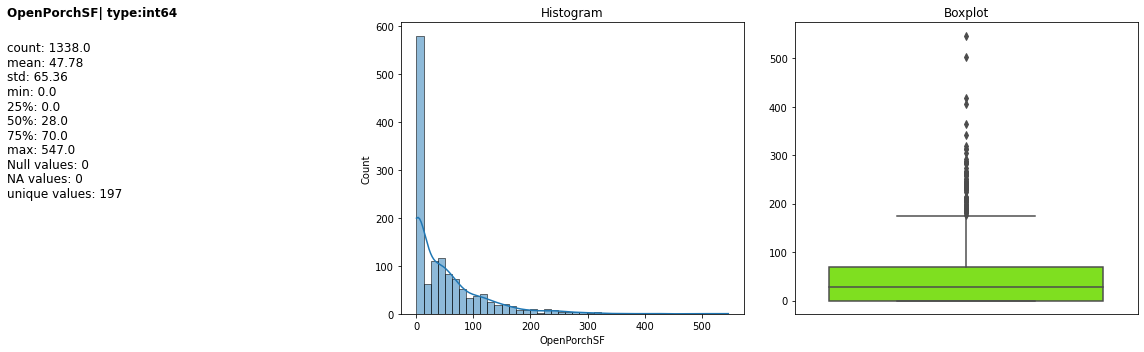

*********************************


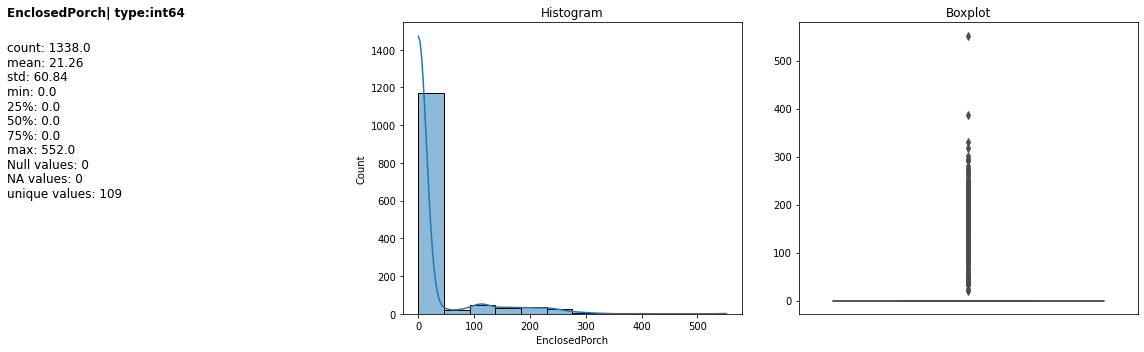

*********************************


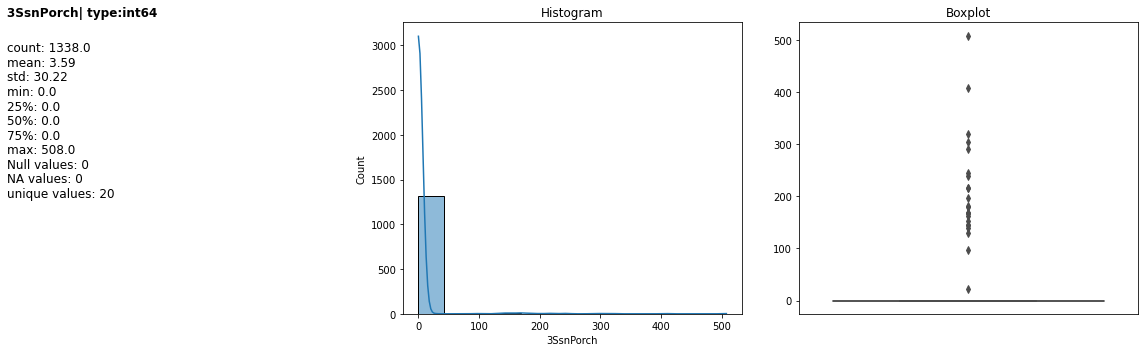

*********************************


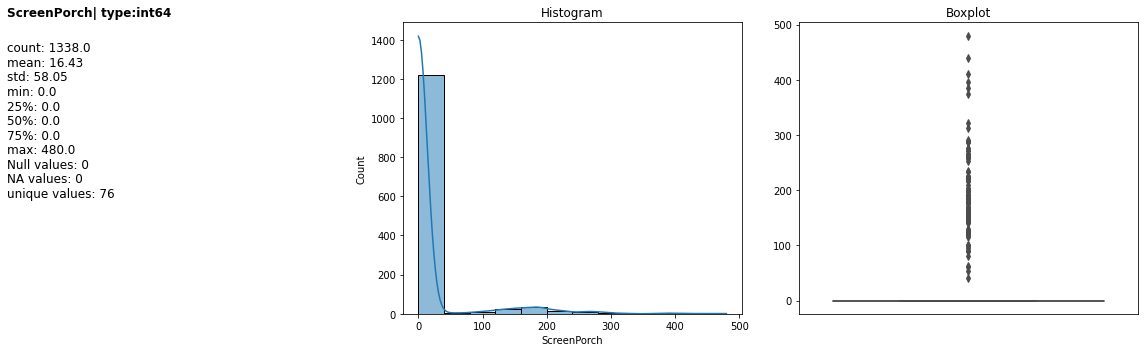

*********************************


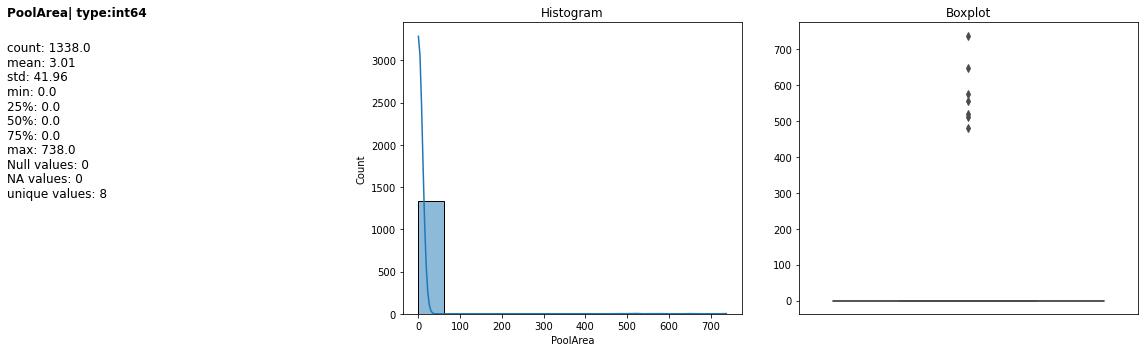

*********************************


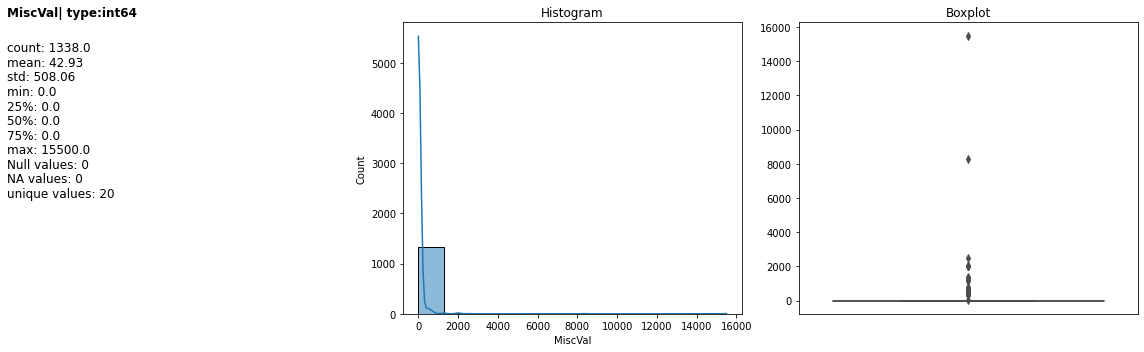

*********************************


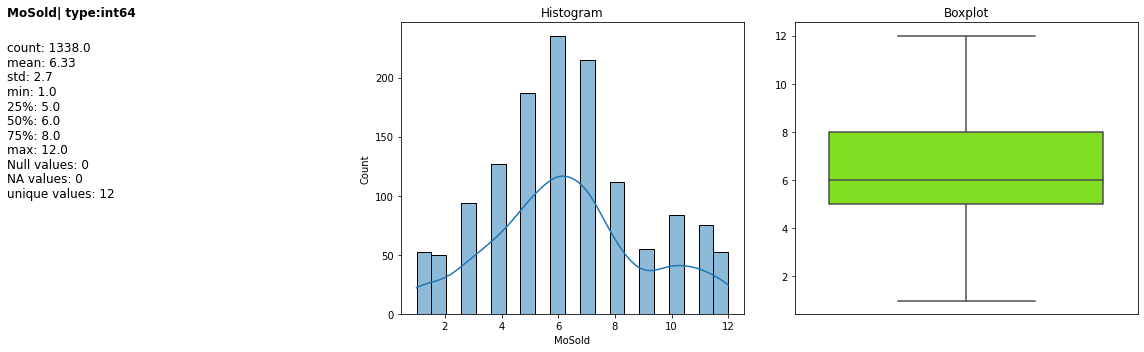

*********************************


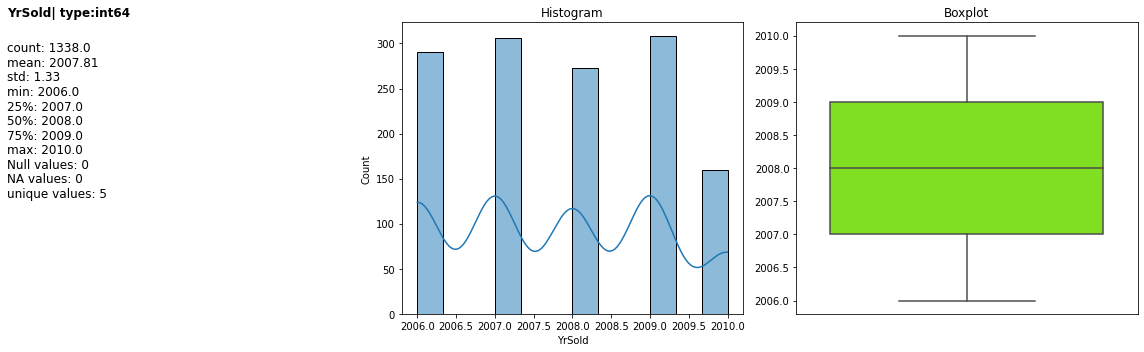


*********************************
***********
SaleType | type: object
***********
There are 9 different values.
WD       1158
New       117
COD        42
ConLD       6
ConLI       4
CWD         4
ConLw       4
Con         2
Oth         1
Name: SaleType, dtype: int64
*********************************


*********************************
***********
SaleCondition | type: object
***********
There are 6 different values.
Normal     1104
Partial     120
Abnorml      86
Family       20
Alloca        7
AdjLand       1
Name: SaleCondition, dtype: int64
*********************************

*********************************


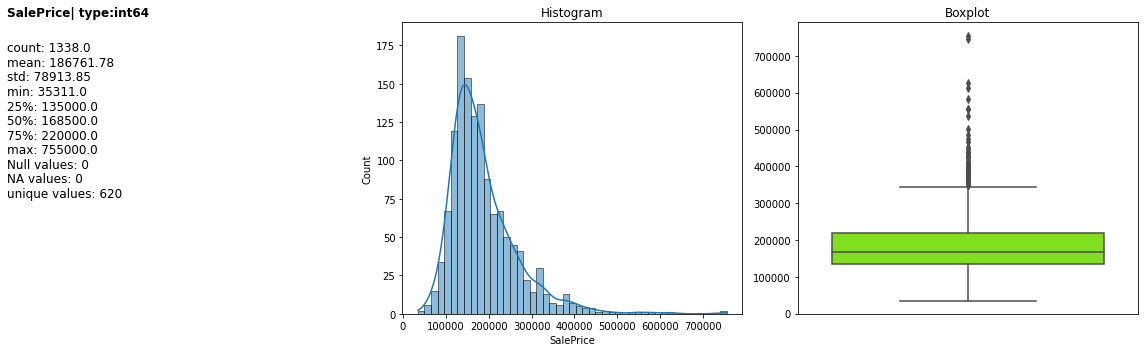

In [ ]:
des_df(df_train)

In [ ]:
df_num_only = df_train.select_dtypes(exclude=['object'])
df_cat_only = df_train.select_dtypes(include=['object'])
df_cat_only["SalePrice"] = df_num_only["SalePrice"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_cat_only

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,142125


In [ ]:
y = df_num_only['SalePrice']
X= df_num_only.iloc[:,:-1]

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
for train, test in cv.split(X,y):
    print(f'Fold:{cnt}, Train set: {len(train)}, Test set:{len(test)}')
    print("train: ", train)
    print("test: ", test)    
    cnt += 1

In [ ]:
def moje_score (muj_model, my_split):

  RMSE_train = []
  RMSE_test = []
  Fold_list = []
  cnt = 1
  for train, test in my_split.split(X,y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    model = muj_model
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    RMSE_train_v = metrics.mean_squared_error(y_train,y_pred_train, squared=False)
    RMSE_test_v = metrics.mean_squared_error(y_test,y_pred_test, squared=False)     

    RMSE_train.append(RMSE_train_v)
    RMSE_test.append(RMSE_test_v)
    Fold_list.append('Fold' + str(cnt))
    result=pd.DataFrame({'Fold': Fold_list, 'RMSE_train':RMSE_train,'RMSE_test':RMSE_test })
    cnt+=1
   
  return result


In [ ]:
moje_score(LinearRegression(), cv)

,Fold,RMSE_train,RMSE_test
0,Fold1,35891.258234,29344.807028
1,Fold2,27455.883592,65805.684777
2,Fold3,34353.685809,37975.278124
3,Fold4,36519.011988,25832.140449
4,Fold5,33599.843041,40282.690193


In [ ]:
moje_score(LinearRegression(), cv).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RMSE_train    33563.936533
RMSE_test     39848.120114
dtype: float64

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth =  np.linspace(2, 200, dtype=int, num=50)
# Minimum number of samples required to split a node
min_samples_split = max_depth
# Minimum number of samples required at each leaf node

In [ ]:
random_grid = {'max_depth': max_depth,'min_samples_split': min_samples_split}
model = DecisionTreeRegressor()

In [ ]:
dt_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = cv, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
dec_tree= moje_score(dt_random, cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ................max_depth=90, min_samples_split=123; total time=   0.0s
[CV] END ................max_depth=90, min_sampl

In [ ]:
dec_tree


,Fold,RMSE_train,RMSE_test
0,Fold1,37054.236324,35647.775322
1,Fold2,31601.763867,45777.431482
2,Fold3,25423.611520,34566.837585
3,Fold4,28573.306265,31420.832483
4,Fold5,31231.782679,40829.647459


In [ ]:
dec_tree["RMSE_test"].mean()

37648.504866160525

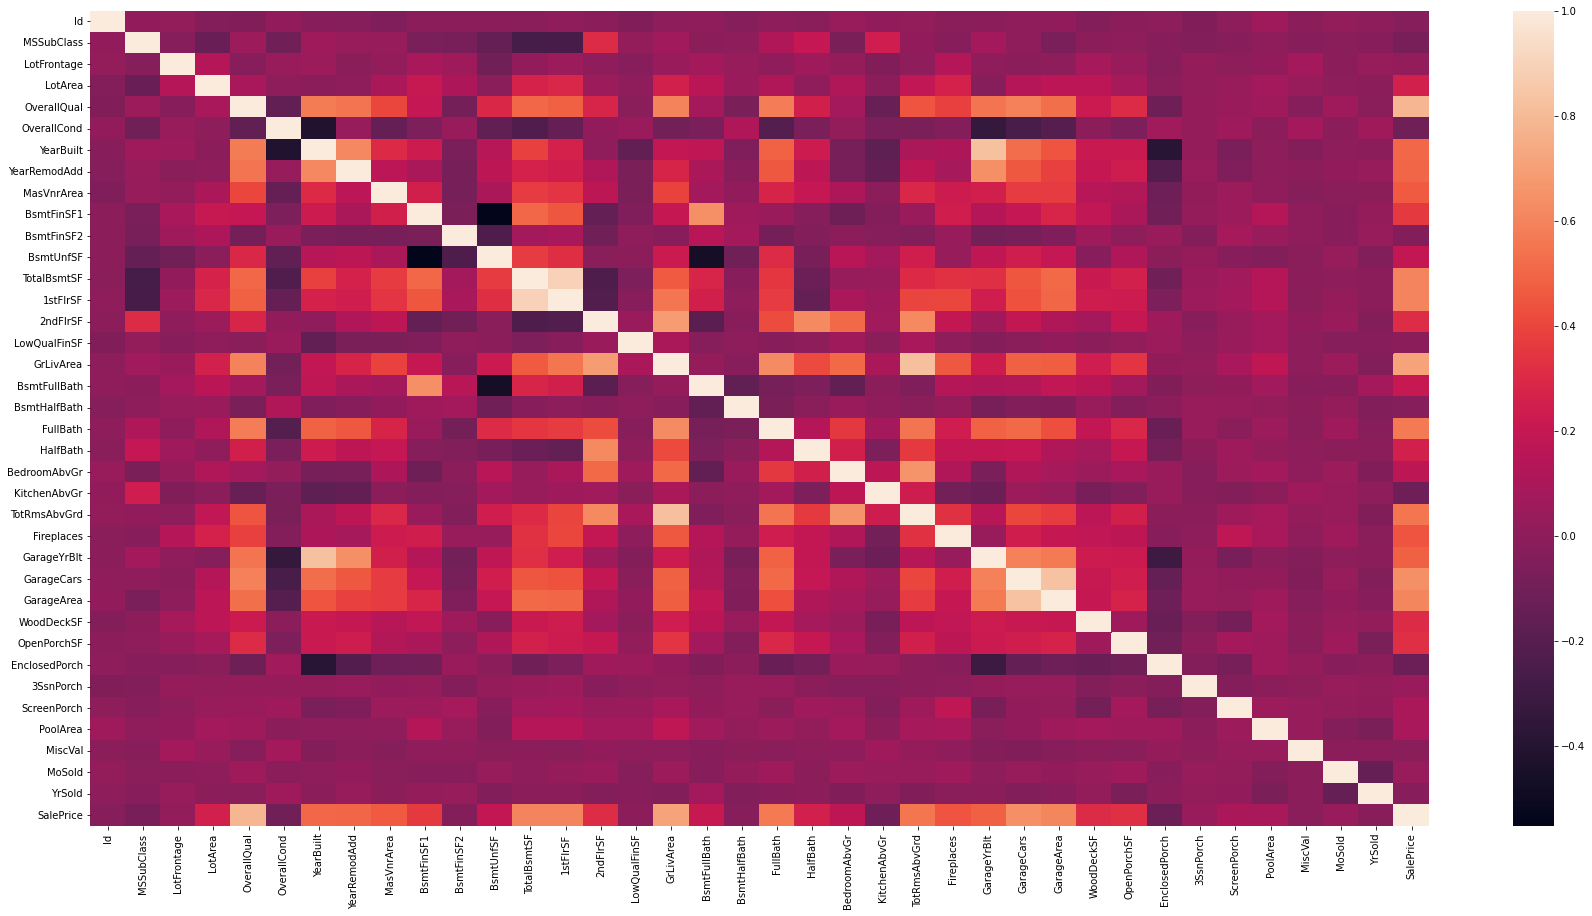

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df_train.corr())
plt.show()

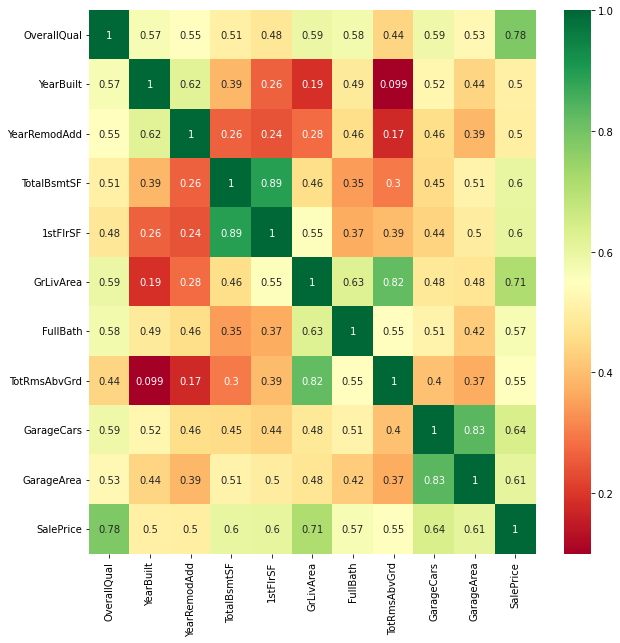

In [ ]:
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
list(top_corr_features)

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [ ]:
df_num_only = df_num_only[list(top_corr_features)]

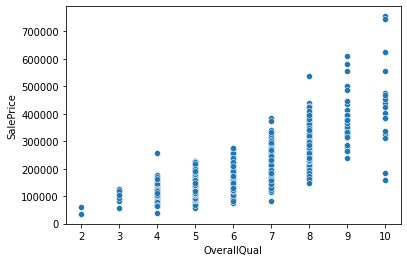

In [ ]:
sns.scatterplot(data=df_train, y='SalePrice', x = 'OverallQual')
plt.show()

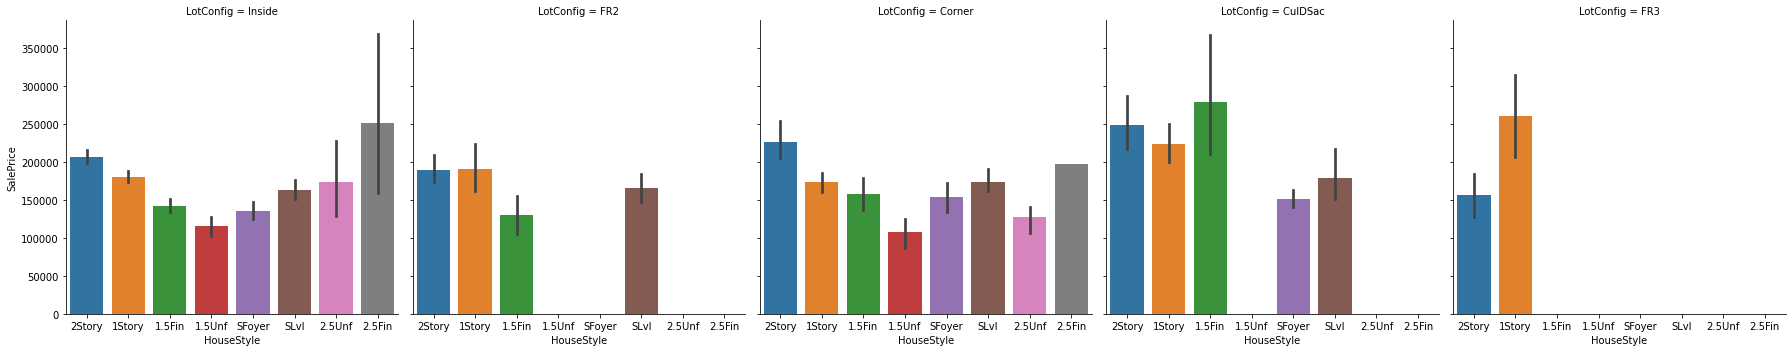

In [ ]:
sns.catplot(data = df_train, x ='HouseStyle', y='SalePrice', kind='bar', col='LotConfig')

In [ ]:
enc = OneHotEncoder()
enc.fit(df_cat_only[['HouseStyle', 'LotConfig']])
X = enc.transform(df_cat_only[['HouseStyle', 'LotConfig']])
names = enc.get_feature_names_out(['HouseStyle', 'LotConfig'])
for i in range(len(names)):
  df_num_only[names[i]] = X.toarray()[:,i]

In [ ]:
df_num_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OverallQual        1338 non-null   int64  
 1   YearBuilt          1338 non-null   int64  
 2   YearRemodAdd       1338 non-null   int64  
 3   TotalBsmtSF        1338 non-null   int64  
 4   1stFlrSF           1338 non-null   int64  
 5   GrLivArea          1338 non-null   int64  
 6   FullBath           1338 non-null   int64  
 7   TotRmsAbvGrd       1338 non-null   int64  
 8   GarageCars         1338 non-null   int64  
 9   GarageArea         1338 non-null   int64  
 10  SalePrice          1338 non-null   int64  
 11  HouseStyle_1.5Fin  1338 non-null   float64
 12  HouseStyle_1.5Unf  1338 non-null   float64
 13  HouseStyle_1Story  1338 non-null   float64
 14  HouseStyle_2.5Fin  1338 non-null   float64
 15  HouseStyle_2.5Unf  1338 non-null   float64
 16  HouseStyle_2Story  1338 

In [ ]:
y = df_num_only['SalePrice']
X= df_num_only.loc[:,df_num_only.columns != 'SalePrice']

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1

In [ ]:
moje_score(LinearRegression(), cv).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RMSE_train    36772.894580
RMSE_test     40564.454301
dtype: float64

In [ ]:
overview = {'RMSE_train':{},'RMSE_test':{}}
def add_results(vysledek, name):
  ###  přidává výsledky modelu do sklovníku ###
  
  RMSE_train = vysledek['RMSE_train'].mean()
  RMSE_test = vysledek['RMSE_test'].mean()
 
  overview['RMSE_train'][name]=RMSE_train
  overview['RMSE_test'][name]=RMSE_test
  return overview

In [ ]:
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth =  np.linspace(2, 200, dtype=int, num=50)
# Minimum number of samples required to split a node
min_samples_split = max_depth
# Minimum number of samples required at each leaf node

In [ ]:
random_grid = {'max_depth': max_depth,'min_samples_split': min_samples_split}
model = DecisionTreeRegressor()
dt_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = cv, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
models = [(dt_random,'DecisionTreeRegressor'), (LinearRegression(),'LinearRegression'), (Lasso(alpha =0.5),'Lasso (alpha =0.5)'), (Lasso(),'Lasso (alpha =1)'),
           (Ridge(alpha =0.5),'Ridge (alpha =0.5)'), (Ridge(),'Ridge (alpha =1)')]

In [ ]:
for model, desc in models:
  overview = add_results(moje_score(model, cv), desc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END .................max_depth=70, min_samples_split=42; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ...............max_depth=103, min_samples_split=179; total time=   0.0s
[CV] END ................max_depth=90, min_samples_split=123; total time=   0.0s
[CV] END ................max_depth=90, min_sampl

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e+10, tolerance: 7.222e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.052e+10, tolerance: 6.026e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
pd.DataFrame(overview)

,RMSE_train,RMSE_test
DecisionTreeRegressor,30200.003353,39038.139381
LinearRegression,36772.894580,40564.454301
Lasso (alpha =0.5),36772.899816,40563.985791
Lasso (alpha =1),36772.916188,40563.573221
Ridge (alpha =0.5),36775.260868,40549.951354
Ridge (alpha =1),36780.800239,40541.968841
